In [ ]:
#P53 Conformational Substate Prediction using Decision Tree Algorithm
#Import Packages
from sklearn import tree
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle


In [ ]:
##Helper Functions##
def load_data(filename):
    ''' Returns a dataframe (df) containing the data in filename. You should
        specify the full path plus the name of the file in filename, relative
        to where you are running code
    '''
    df = pd.read_csv(filename)
    return df

def split_data(df, train_proportion):
    ''' Inputs
            * df: dataframe containing data
            * train_proportion: proportion of data in df that will be used for
                training. 1-train_proportion is proportion of data to be used
                for testing
        Output
            * train_df: dataframe containing training data
            * test_df: dataframe containing testing data
    '''
    # Make sure there are row numbers
    df = df.reset_index(drop=True)

    # Reorder examples and split data according to train proportion
    train = df.sample(frac=train_proportion, axis=0)
    test = df.drop(index=train.index)
    return train, test

def to_numpy(df):
    a = df.to_numpy()
    return a.T

def get_X_y_data(df, features, target):
    ''' Split dataframe into X and y numpy arrays '''
    X_df = df.loc[:, df.columns != target]
    Y_df = df[target]
    X = to_numpy(X_df)
    Y = to_numpy(Y_df)
    return X, Y

In [ ]:
df = load_data('1tup_revised_features_electro.csv')
features = {'1tup_pep[elec14]','1tup_pep[elec]','1tup_pep[total]','DRMSD'}
target = 'Type'

y = df['Type']
X = df.drop(['Type'],axis=1)

[Text(0.5, 0.75, 'x[0] <= 7079.759\ngini = 0.5\nsamples = 5000\nvalue = [2500, 2500]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2500\nvalue = [2500, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 2500\nvalue = [0, 2500]')]

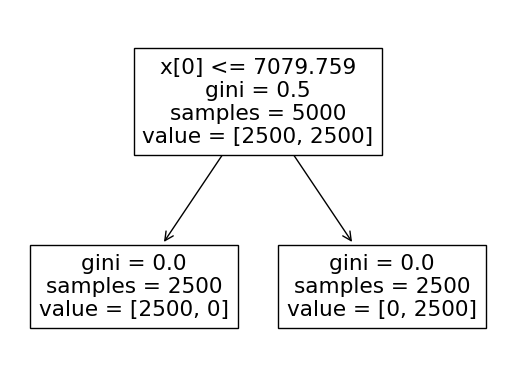

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)
tree.plot_tree(clf)

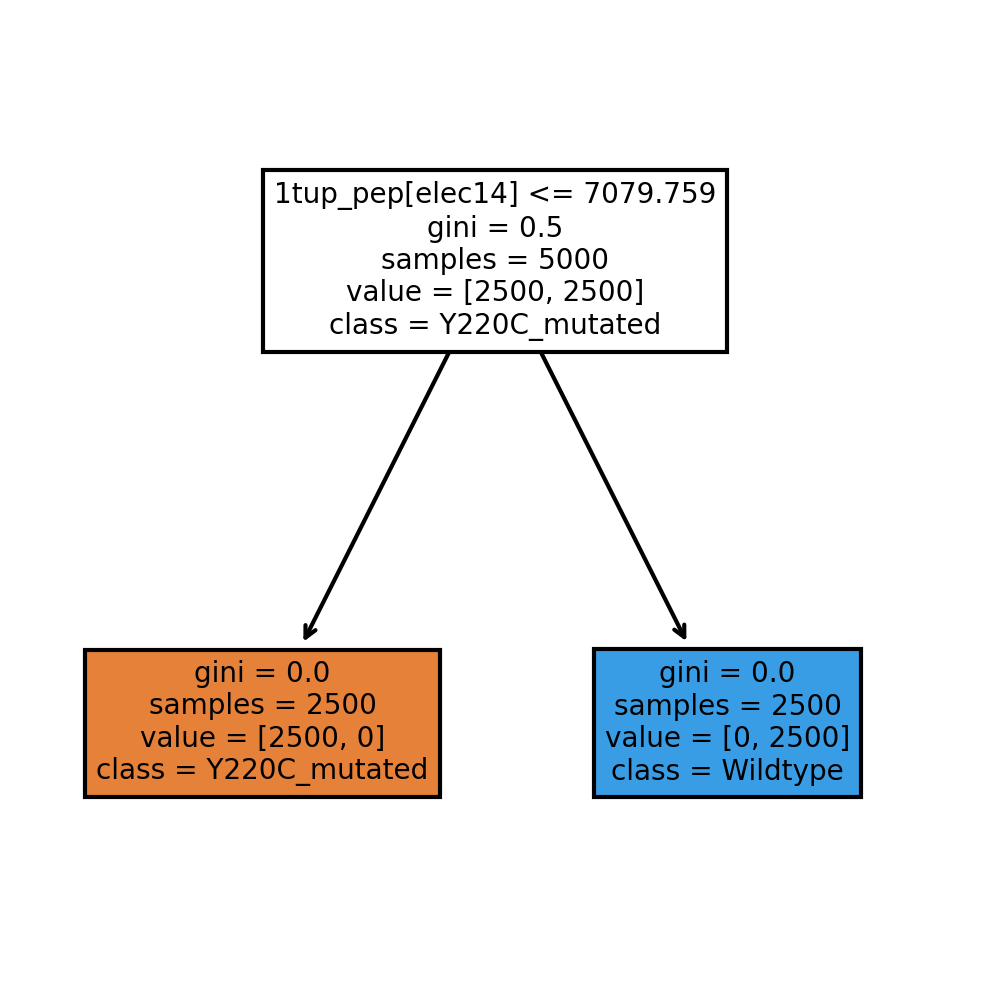

In [ ]:
fn=['1tup_pep[elec14]','1tup_pep[elec]','1tup_pep[total]','DRMSD']
cn=['Y220C_mutated', 'Wildtype']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')

In [ ]:
PK11000df = load_data('1tup_PK11000_revised_features_electro.csv')
PK11000_X = PK11000df.iloc[:,3:]
PK11000_y = PK11000df.iloc[:,0]
cross_val_score(clf, PK11000_X, PK11000_y, cv=10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
clf.score(PK11000_X,PK11000_y)

0.0

In [ ]:
clf.predict(PK11000_X)

array([0, 0, 0, ..., 0, 0, 0])